# Assignment 1: Bloated real-estate market!

## Instructions to submit the assignment

- Please upload your solutions as a singple *ipynb* file on Canvas under Assignment 1.
- DO NOT remove output boxes while uploading the notebook.
- Your solution notebook must contain the python code that we can run to verify the answers.
- Upload your jupyter notebook on LumiNUS in the *Assignment 1 Submissions* folder. **The folder will close at 23:59 on 15/02/2023**. 
- Late submissions will receive a penalty on the grade as follows:
  - late within 1 hour: 10% reduction in grade
  - late within 6 hours: 30% reduction in grade
  - late within 12 hours: 50% reduction in grade
  - late within 1 day: 70% reduction in grade
  - after 1 day: zero mark

**This is an INDIVIDUAL ASSESSMENT. You must refrain from working in groups!**

In [56]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Question 1: Loading the data

With more than 1 million flats spread across 24 towns and 3 estates, the Singapore brand of public housing is uniquely different. The flats spell home for over 80% of Singapore's resident population, of which, about 90% own their home. 

Data.gov is a repository of many datasets that are made available by different public service bodies in Singapore. In this assignment we will work on [HDB Resale Price](https://data.gov.sg/dataset/resale-flat-prices) available through the same datastore. It houses the resale price data from January 1990 to December 2020 on a monthly basis. We will be working on the resale records from 2000 to 2020.

Let's start exploring this dataset.

We have downloaded the dataset for you. It is available in *Assignment_1* under files in the LumiNUS. Uncompress the file in your working directory. You will see that it comprises of multiple CSV files. Please perform following tasks:

- Create a single dataframe in `pandas` by reading and appending all CSV files that have names `resale*`. 
- Print the total number of HDB resales records.

<div align="right"> (1 point) </div>

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
file_list = ['/content/drive/MyDrive/IT5006/Assignment 1/resale-flat-prices-based-on-approval-date-1990-1999.csv',
             '/content/drive/MyDrive/IT5006/Assignment 1/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv',
             '/content/drive/MyDrive/IT5006/Assignment 1/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv',
             '/content/drive/MyDrive/IT5006/Assignment 1/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv',
             '/content/drive/MyDrive/IT5006/Assignment 1/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv']
data_df = pd.concat(pd.read_csv(f) for f in file_list)

data_df.shape[0]

891721

## Question 2: Data Imputation

Print the count of missing values in every column of the dataframe.
<div align="right"> (1 point) </div>

In [59]:
data_df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

We observe that the `remaining_lease` feature has multiple missing values. Impute the missing values and ensure that the dataframe does not contain any missing value.

*Hint: What is the lease period of every HDB flat in Singapore? [ Find out here.](https://www.gov.sg/article/do-i-really-own-my-hdb-flat)*
<div align="right"> (1 point) </div>

In [60]:
data_df["month"] = pd.to_datetime(data_df["month"])
data_df["remaining_lease"] = 99 - (data_df["month"].dt.year - data_df["lease_commence_date"])

data_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85
...,...,...,...,...,...,...,...,...,...,...,...
145513,2023-01-01,YISHUN,5 ROOM,505B,YISHUN ST 51,10 TO 12,112.0,Improved,2016,670000.0,92
145514,2023-01-01,YISHUN,5 ROOM,760,YISHUN ST 72,04 TO 06,122.0,Improved,1987,548000.0,63
145515,2023-01-01,YISHUN,EXECUTIVE,344,YISHUN AVE 11,01 TO 03,145.0,Maisonette,1988,755000.0,64
145516,2023-01-01,YISHUN,EXECUTIVE,387,YISHUN RING RD,10 TO 12,145.0,Apartment,1988,770000.0,64


Create a new feature `price_per_sqm` that lists the price per square meter of the resale record.

<div align="right">(1 point)</div>

In [61]:
data_df["price_per_sqm"] = data_df["resale_price"] / data_df["floor_area_sqm"]
data_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,price_per_sqm
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86,290.322581
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86,193.548387
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86,258.064516
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86,193.548387
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85,646.575342
...,...,...,...,...,...,...,...,...,...,...,...,...
145513,2023-01-01,YISHUN,5 ROOM,505B,YISHUN ST 51,10 TO 12,112.0,Improved,2016,670000.0,92,5982.142857
145514,2023-01-01,YISHUN,5 ROOM,760,YISHUN ST 72,04 TO 06,122.0,Improved,1987,548000.0,63,4491.803279
145515,2023-01-01,YISHUN,EXECUTIVE,344,YISHUN AVE 11,01 TO 03,145.0,Maisonette,1988,755000.0,64,5206.896552
145516,2023-01-01,YISHUN,EXECUTIVE,387,YISHUN RING RD,10 TO 12,145.0,Apartment,1988,770000.0,64,5310.344828


## Question 3: Data Visualisation

Create four different data panels from the original dataframe.
- First panel contains the records from January 2018 to December 2018
- Second panel contains the records from January 2019 to December 2019
- Third panel contains the records from January 2020 to December 2020
- Fourth panel contains the records from January 2021 to December 2021

In order to do so, create a column `panel` that contains the panel number for every datapoint
<div align="right"> (1 point) </div>

In [62]:
def timeClassification(time):
  if str(time)[2:4] == '18':
    return '1'
  elif str(time)[2:4] == '19':
    return '2'
  elif str(time)[2:4] == '20':
    return '3'
  elif str(time)[2:4] == '21':
    return '4'
  elif str(time)[2:4] == '22': # For later question use, define one more year here
    return '5'


data_df["panel"] = data_df["month"].apply(timeClassification) 

data_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,price_per_sqm,panel
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86,290.322581,None
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86,193.548387,None
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86,258.064516,None
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86,193.548387,None
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85,646.575342,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145513,2023-01-01,YISHUN,5 ROOM,505B,YISHUN ST 51,10 TO 12,112.0,Improved,2016,670000.0,92,5982.142857,None
145514,2023-01-01,YISHUN,5 ROOM,760,YISHUN ST 72,04 TO 06,122.0,Improved,1987,548000.0,63,4491.803279,None
145515,2023-01-01,YISHUN,EXECUTIVE,344,YISHUN AVE 11,01 TO 03,145.0,Maisonette,1988,755000.0,64,5206.896552,None
145516,2023-01-01,YISHUN,EXECUTIVE,387,YISHUN RING RD,10 TO 12,145.0,Apartment,1988,770000.0,64,5310.344828,None


For every panel, show a lineplot of resale prices versus the time, colour-coded by `flat_type`. Only include *5 ROOM, 4 ROOM, 3 ROOM, 2 ROOM, 1 ROOM* types in the lineplot.  Please ensure following things: 
- Four plots must be in one row with the leftmost plot displaying the first panel and the rightmost displaying the fourth panel.
- All plots must share the same range of resale prices on their `y` axes.
- Colour coding for the `flat_type` must be consistent across the panels.
- The entire plot should have the title: "Resale Prices of Different Flat Types"

<div align="right"> (4 points) </div>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

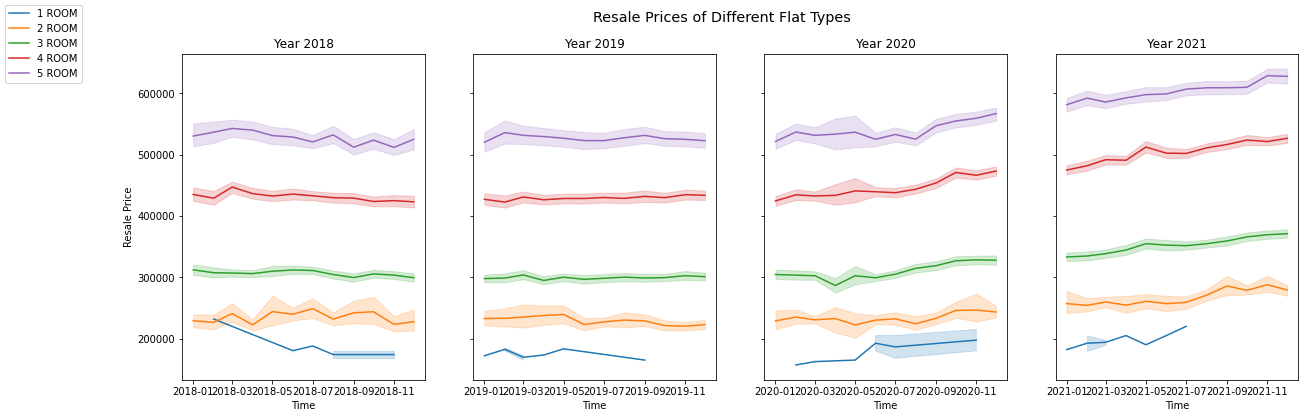

In [63]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(20,6))
plt.suptitle("Resale Prices of Different Flat Types", fontsize="x-large")
room_type = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM']

df_2018 = data_df[data_df["panel"] == '1' ]
sns.lineplot('month', 'resale_price', data = df_2018.loc[df_2018['flat_type'].isin(room_type)], ax = ax1, x='month', y='resale_price', hue='flat_type', hue_order=room_type, palette='tab10')
ax1.set_title("Year 2018")
ax1.set_xlabel("Time")
ax1.set_ylabel("Resale Price")

df_2019 = data_df[data_df['panel'] == '2' ]
sns.lineplot('month', 'resale_price', data = df_2019.loc[df_2019['flat_type'].isin(room_type)], ax = ax2, x='month', y='resale_price', hue='flat_type', hue_order=room_type, legend = False, palette='tab10')
ax2.set_title("Year 2019")
ax2.set_xlabel("Time")
ax2.set_ylabel("Resale Price")

df_2020 = data_df[data_df['panel'] == '3' ]
sns.lineplot('month', 'resale_price', data = df_2020.loc[df_2020['flat_type'].isin(room_type)], ax = ax3, x='month', y='resale_price', hue='flat_type', hue_order=room_type, legend = False, palette='tab10')
ax3.set_title("Year 2020")
ax3.set_xlabel("Time")
ax3.set_ylabel("Resale Price")

df_2021 = data_df[data_df['panel'] == '4' ]
sns.lineplot('month', 'resale_price', data = df_2021.loc[df_2021['flat_type'].isin(room_type)], ax = ax4, x='month', y='resale_price', hue='flat_type', hue_order=room_type, legend = False, palette='tab10')
ax4.set_title("Year 2021")
ax4.set_xlabel("Time")
ax4.set_ylabel("Resale Price")

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left')
ax1.get_legend().remove()

plt.show()

# Question 3: Bootstrap and Confidence Intervals

In Week 2, we learnt the role of statistics connecting the observation on samples to their estimates on the population. Let's us create a simulation of the experiment and validate the central limit theorem.

We will treat `df` as the population and take *bootstrap samples* (of size 100 datapoints each) from it. Please write code that does the following.
- Generates 1000 bootstrap samples.
- Compute sample mean for `price_per_sqm` for every sample.
- Plot a histogram of mean (does it not look like a normal distribution!)

<div align="right"> (3 points) </div>

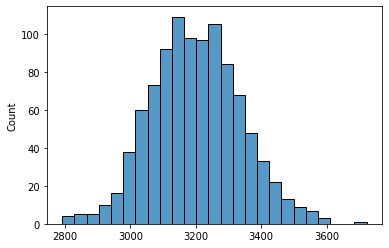

In [64]:
sample_means = []
for i in range(1000):
  sample_means.append(data_df.sample(n=100, replace = True).price_per_sqm.mean())
sample_means = pd.Series(sample_means)
sample_means

sns.histplot(data = sample_means)

Generate 95% confidence interval for the (population) mean of `price_per_sqm` using the bootstrap samples.
<div align="right"> (2 points) </div>

In [65]:
c_interval = st.norm.interval(alpha=0.95, loc=np.mean(sample_means), scale=st.sem(sample_means))

c_interval

(3192.2357293407786, 3209.2068121075963)

Does the population mean lie inside it?

<div align="right">(1 point)</div>

In [66]:
data_df['price_per_sqm'].mean()

# Yes, the population mean lies inside the 95% confidence interval

3204.432630472826

## Question 4: Growing Resale Prices!

In 2019, the rental cost of a 3BR HDB in Clementi used to be around 2500 dollars, and now it has reached as high as 4100. dollars. Some analysis shows that it is caused due to COVID. Well, we are not sure about that yet!

Is it true about the resale prices as well? Is there some correlation? Let's analyse the growth of various areas in Singapore.

- Compute the *median* `price_per_sqm` of houses in various areas in 2019 and 2022.
- We define *growth* as the normalised difference between the median housing `price_per_sqm` in 2019 and 2022, i.e. *(price_per_sqm_2022 - price_per_sqm_2019) / price_per_sqm_2019*. Compute `growth` of various areas in Singapore.
- Create a dataframe that contains four columns: `town`, `2019_median`, `2022_median` and `growth`. Print the dataframe sorted in descending order of the growth.



<div align="right"> (3 points) </div>

In [67]:
# Point 1
df_2019 = data_df[data_df['panel']=="2"]
df_2019 = df_2019[['town','price_per_sqm']].groupby("town").median()
df_2019.columns = ['2019_pps (median)']

df_2022 = data_df[data_df['panel']=="5"] # use the timeClassification function defined before, to quikly find the 2022 data
df_2022 = df_2022[['town','price_per_sqm']].groupby("town").median()
df_2022.columns = ['2022_pps (median)']

# Point 2 & Point 3
df_19_22 = pd.concat([df_2019,df_2022], axis = 1)
df_19_22['growth'] = (df_19_22['2022_pps (median)']-df_19_22['2019_pps (median)']) / df_19_22['2019_pps (median)']
df_19_22.sort_values('growth', ascending = False, inplace=True)

df_19_22

,2019_pps (median),2022_pps (median),growth
town,,,
CHOA CHU KANG,3367.934426,4888.888889,0.451599
SEMBAWANG,3664.122137,5284.050179,0.442105
WOODLANDS,3445.799060,4779.411765,0.387026
BUKIT BATOK,3750.000000,5130.156318,0.368042
YISHUN,3838.121118,5140.186916,0.339246
KALLANG/WHAMPOA,5283.882784,7000.000000,0.324783
JURONG WEST,3719.008264,4864.864865,0.308108
ANG MO KIO,4117.647059,5328.911501,0.294164
HOUGANG,4047.619048,5238.095238,0.294118


Do some research to qualitatively reason why COVID might have caused this surge in resale prices. Please provide two reasons for the same.
<div align="right"> (2 point) </div>

Reason 1:
During the covid time, the WFH is a common pattern. With more companies adopting the hybrid working mode and more people working from home, there is a greater need for large living spaces now. Therefore, people's demand for larger houses are higher. HDB, as the cheaper prices compared to condo, are a better choice when people are thinking of buying larger houses.

Reason 2:
During the covid pandemic, many new HDB constrution and paused due to the workers health protection and government covid policy. However, people's house demand keep increasing but the available options doesn't increase. This also results in the increase in HDB resale price.